# Model Training

In [2]:
!pip install catboost xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 10.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 10.0 MB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 17.8 MB/s eta 0:00:00 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Modelling
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
## Import data
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df['average_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])/3

In [8]:
df.drop(['math_score', 'reading_score', 'writing_score'], axis=1, inplace=True)

In [10]:
## Preparing Independent X and dependent y variables
X = df.drop('average_score', axis=1)
y = df['average_score']

In [11]:
## Feature Scaling
## Create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude=['object']).columns
cat_features = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preproccessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', num_transformer, num_features)
    ]
)


In [12]:
X = preproccessor.fit_transform(X)

In [13]:
## Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape,X_test.shape

((800, 17), (200, 17))

In [17]:
## Evalueate the model to give the metrics
def evaluate_model(true,predicted):
    mse = mean_squared_error(true, predicted)
    r2 = r2_score(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mse)
    
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print(f'MSE: {mse:.2f}')
    print(f"MAE: {mae:.2f}\n")
    
    return mae,mse,rmse,r2

In [19]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso Regression":Lasso(),
    "Ridge Regression":Ridge(),
    "KNN":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "AdaBoost":AdaBoostRegressor(),
    "Support Vector Machine":SVR(),
    "CatBoost":CatBoostRegressor(verbose=False),
    "XGBoost":XGBRegressor()
}

model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Model: {list(models.keys())[i]}")
    mae,mse,rmse,r2 = evaluate_model(y_test, y_pred)
    
    model_list.append(list(models.keys())[i])
    r2_list.append(r2)

    print('Model Performance on Test dataset')
    print(f'Root Mean Squared Error: {rmse:.2f}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'R2 Score: {r2:.2f}\n')               

Model: Linear Regression
RMSE: 13.40
R2 Score: 0.16
MSE: 179.60
MAE: 10.49

Model Performance on Test dataset
Root Mean Squared Error: 13.40
Mean Squared Error: 179.60
Mean Absolute Error: 10.49
R2 Score: 0.16

Model: Lasso Regression
RMSE: 14.13
R2 Score: 0.07
MSE: 199.76
MAE: 11.09

Model Performance on Test dataset
Root Mean Squared Error: 14.13
Mean Squared Error: 199.76
Mean Absolute Error: 11.09
R2 Score: 0.07

Model: Ridge Regression
RMSE: 13.40
R2 Score: 0.16
MSE: 179.65
MAE: 10.49

Model Performance on Test dataset
Root Mean Squared Error: 13.40
Mean Squared Error: 179.65
Mean Absolute Error: 10.49
R2 Score: 0.16

Model: KNN
RMSE: 14.82
R2 Score: -0.03
MSE: 219.76
MAE: 11.60

Model Performance on Test dataset
Root Mean Squared Error: 14.82
Mean Squared Error: 219.76
Mean Absolute Error: 11.60
R2 Score: -0.03

Model: Decision Tree
RMSE: 15.17
R2 Score: -0.07
MSE: 230.04
MAE: 11.79

Model Performance on Test dataset
Root Mean Squared Error: 15.17
Mean Squared Error: 230.04
Mean 

In [26]:
## Results
results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)
results.reset_index(drop=True, inplace=True)

In [27]:
results

,Model,R2 Score
0,Linear Regression,0.162172
1,Ridge Regression,0.161946
2,Support Vector Machine,0.125608
3,AdaBoost,0.098351
4,Lasso Regression,0.068120
5,KNN,-0.025144
6,Random Forest,-0.037529
7,CatBoost,-0.044386
8,XGBoost,-0.070459
9,Decision Tree,-0.073114


In [28]:
## So Linear Regression is the best model for this dataset with R2 score of 0.16
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

score = r2_score(y_test, y_pred)
print(f"R2 Score of Linear Regression model: {score:.2f}")

R2 Score of Linear Regression model: 0.16


Text(0.5, 1.0, 'Actual vs Predicted Values')

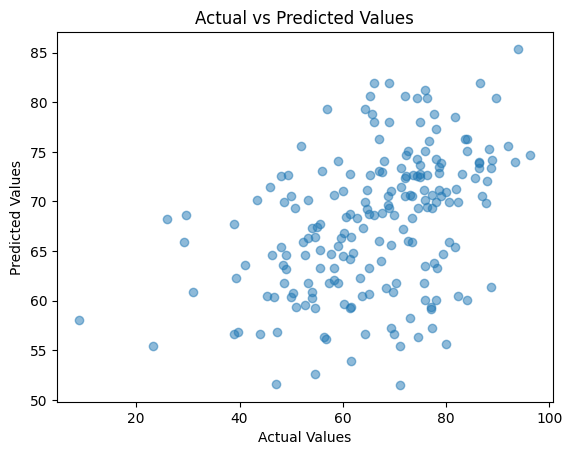

In [29]:
## Plot y_test vs y_pred
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

Text(0.5, 1.0, 'Actual vs Predicted Values')

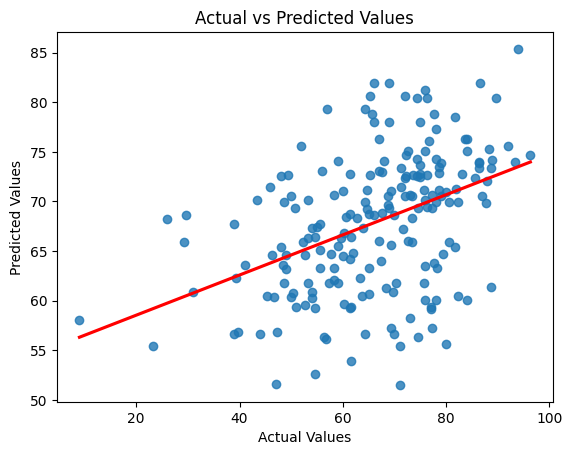

In [30]:
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={"color": "red"})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

In [31]:
## Difference between y_test and y_pred
pred_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'difference': y_test - y_pred})
pred_df['difference'] = pred_df['difference'].abs().round(2)
pred_df.sort_values(by='difference', ascending=False, inplace=True)
pred_df.reset_index(drop=True, inplace=True)
pred_df

,y_test,y_pred,difference
0,9.000000,58.042132,49.04
1,26.000000,68.200214,42.20
2,29.666667,68.610911,38.94
3,29.333333,65.865799,36.53
4,23.333333,55.451232,32.12
...,...,...,...
195,69.000000,69.293834,0.29
196,72.333333,72.531591,0.20
197,71.333333,71.473198,0.14
198,56.333333,56.369164,0.04
